<a href="https://colab.research.google.com/drive/1tAgbjrtiVSNS4MmNjzobwZF5Vd1EWMwy?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

# Road Accidents in Russian Federation

Let's study the statistics of road accidents in the Russian Federation and try to identify some patterns.

Let's take three cities of federal significance as a basis: Moscow, St. Petersburg and Sevastopol. And we will study the official statistics of the State Traffic Safety Inspectorate for these cities for February 2025.

First, let's understand which day of the week is the most risky and which is the least.

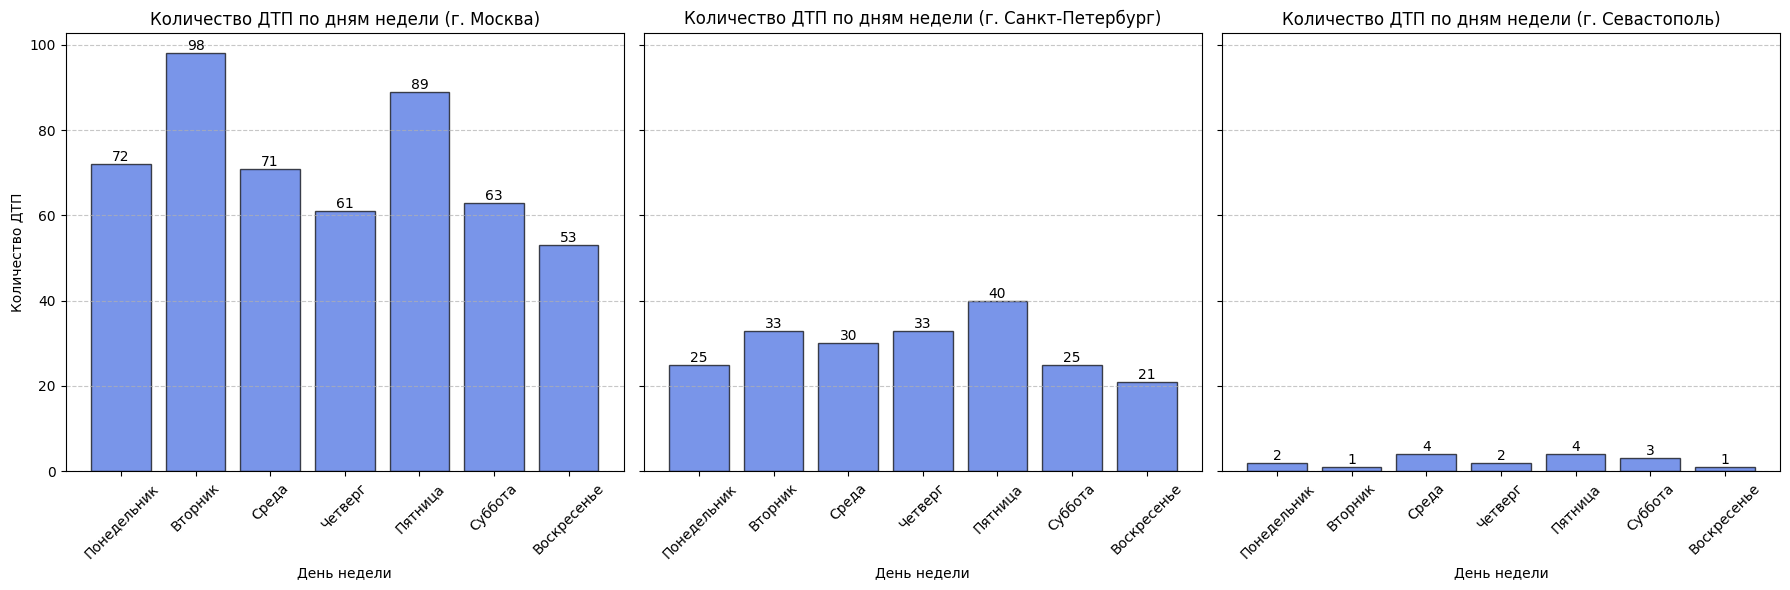

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

cities = ['г. Москва', 'г. Санкт-Петербург', 'г. Севастополь']

xls = pd.ExcelFile("./assets/dtp1.xls")
dfs = [pd.read_excel(xls, sheet_name=sheet, skiprows=9, nrows=32, usecols="B,D").dropna() for sheet in xls.sheet_names]
days_of_week = ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for ax, df, city in zip(axes, dfs, cities):
    accidents = df.iloc[:7, 1].astype(int).tolist()

    bars = ax.bar(days_of_week, accidents, color='royalblue', alpha=0.7, edgecolor='black')
    for bar, value in zip(bars, accidents):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=10, color='black')
    ax.set_title(f"Количество ДТП по дням недели ({city})")
    ax.set_xlabel("День недели")
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(days_of_week, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

axes[0].set_ylabel("Количество ДТП")
plt.tight_layout()
plt.show()

Now let's sum it up and identify specific days of the week

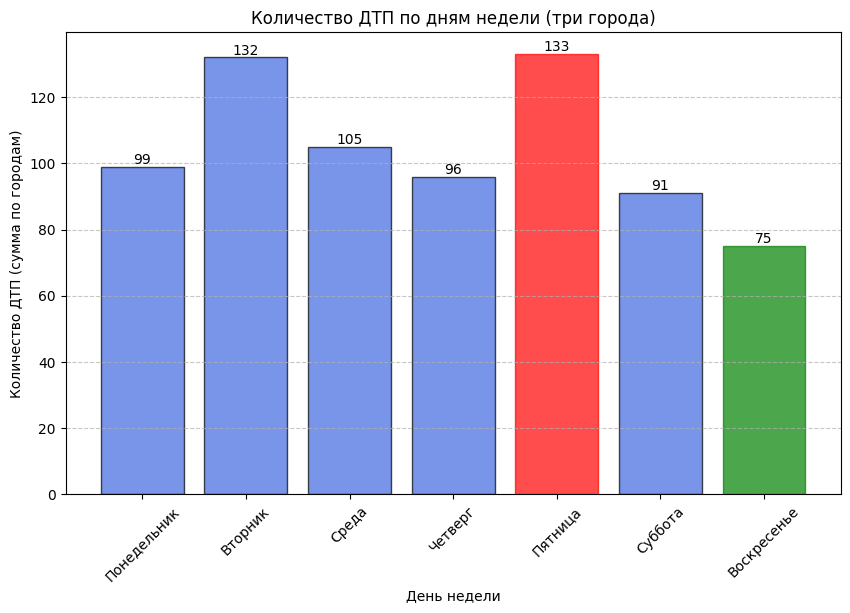

In [114]:
import numpy as np

accidents_total = sum(df.iloc[:7, 1].astype(int) for df in dfs).tolist()
plt.figure(figsize=(10, 6))
bars = plt.bar(days_of_week, accidents_total, color='royalblue', alpha=0.7, edgecolor='black')
bars[np.argmax(accidents_total)].set_color('red')
bars[np.argmin(accidents_total)].set_color('green')
for bar, value in zip(bars, accidents_total):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel("День недели")
plt.ylabel("Количество ДТП (сумма по городам)")
plt.title("Количество ДТП по дням недели (три города)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Well, as we can see, Friday and Tuesday are the days when the most accidents occur. In turn, Sunday is the opposite - the day when accidents happen the least.

There are fewer drivers on the roads on Sunday, since it is a day off. Tuesday and Friday are weekdays, that is, working days. Perhaps people are in a hurry to or from work and therefore get into accidents more often.

Let's take a closer look at the times when accidents happen more often and less often.

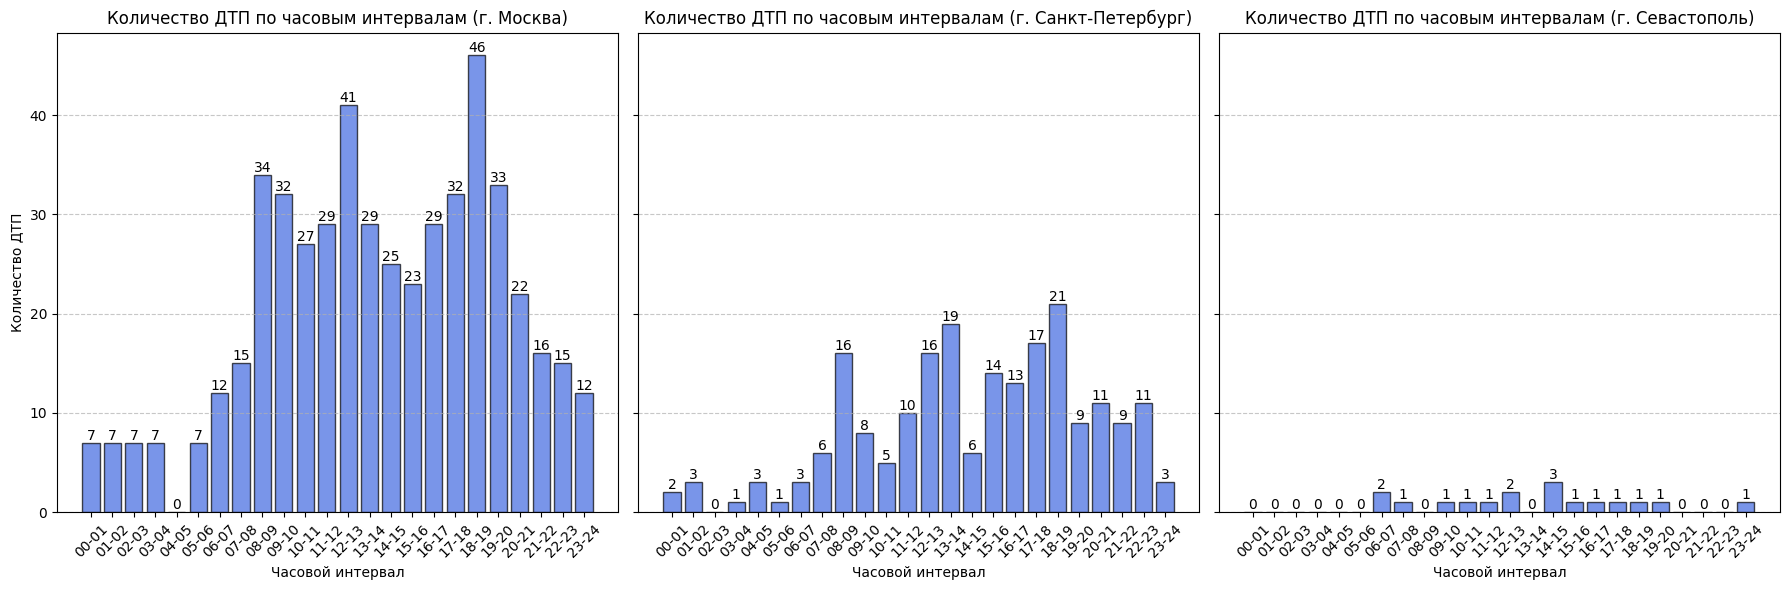

In [121]:
times = [f"{hour:02d}-{hour+1:02d}" for hour in range(24)]
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for ax, df, city in zip(axes, dfs, cities):
    accidents = df.iloc[-24:, 1].astype(int).tolist()

    bars = ax.bar(times, accidents, color='royalblue', alpha=0.7, edgecolor='black')
    for bar, value in zip(bars, accidents):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=10, color='black')
    ax.set_title(f"Количество ДТП по часовым интервалам ({city})")
    ax.set_xlabel("Часовой интервал")
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(times, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

axes[0].set_ylabel("Количество ДТП")
plt.tight_layout()
plt.show()

We have statistics for three cities. Now let's identify the most and least risky time intervals

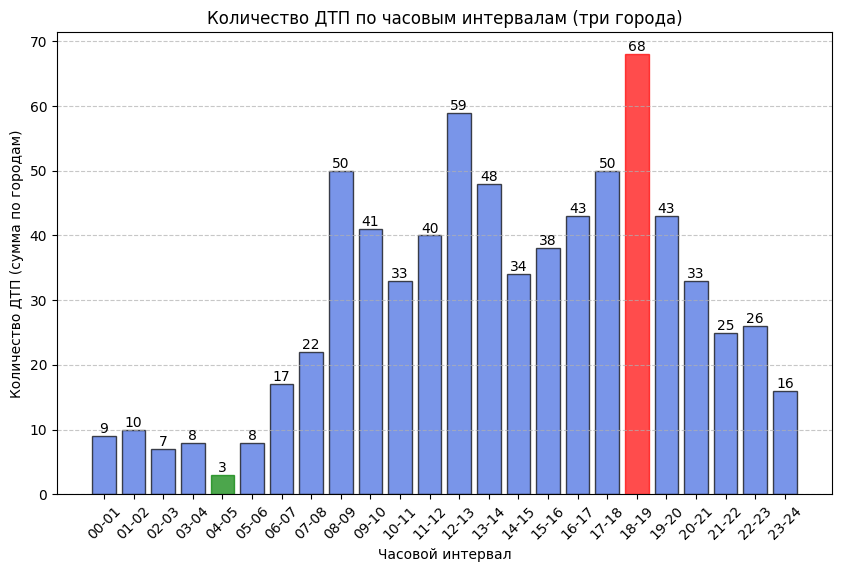

In [122]:
accidents_total = sum(df.iloc[-24:, 1].astype(int) for df in dfs).tolist()
plt.figure(figsize=(10, 6))
bars = plt.bar(times, accidents_total, color='royalblue', alpha=0.7, edgecolor='black')
bars[np.argmax(accidents_total)].set_color('red')
bars[np.argmin(accidents_total)].set_color('green')
for bar, value in zip(bars, accidents_total):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel("Часовой интервал")
plt.ylabel("Количество ДТП (сумма по городам)")
plt.title("Количество ДТП по часовым интервалам (три города)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As we can see, the greatest number of accidents occur between 18:00 and 19:00. This indicates that people returning home from work on Friday evenings are most likely to get into accidents. The roads are busy at this time, drivers have reduced concentration after a working day, etc. This leads to accidents.

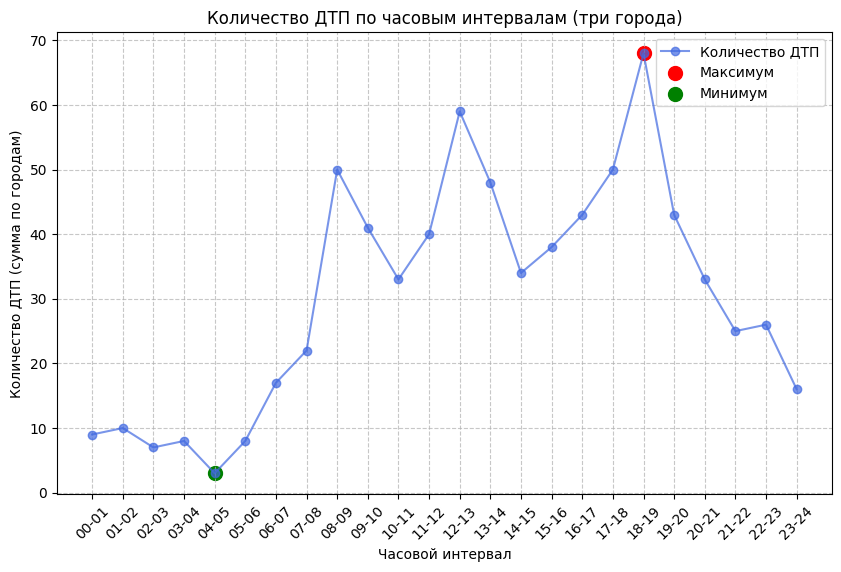

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(times, accidents_total, marker='o', linestyle='-', color='royalblue', alpha=0.7, label="Количество ДТП")
max_index = np.argmax(accidents_total)
min_index = np.argmin(accidents_total)
plt.scatter(times[max_index], accidents_total[max_index], color='red', s=100, label="Максимум")
plt.scatter(times[min_index], accidents_total[min_index], color='green', s=100, label="Минимум")
plt.xlabel("Часовой интервал")
plt.ylabel("Количество ДТП (сумма по городам)")
plt.title("Количество ДТП по часовым интервалам (три города)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Now let's explore which drivers are most likely to get into accidents.

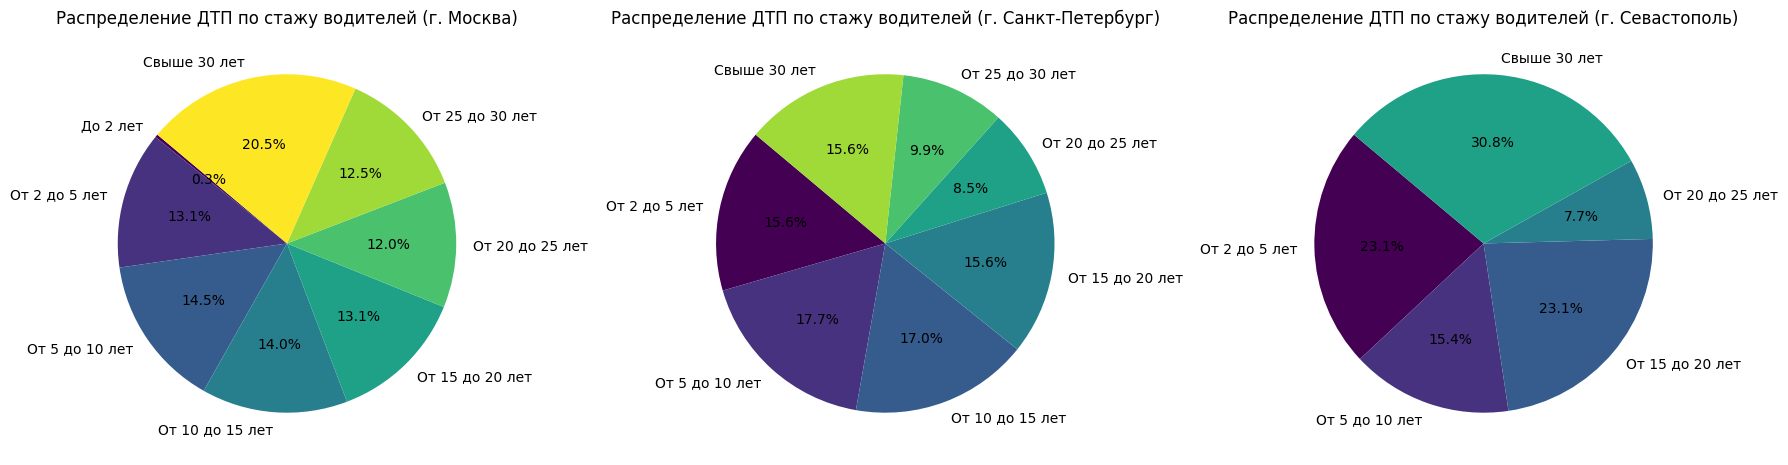

In [97]:
xls = pd.ExcelFile("./assets/dtp2.xls")
dfs = [pd.read_excel(xls, sheet_name=sheet, skiprows=69, nrows=12, usecols="B,D").dropna() for sheet in xls.sheet_names]
categories = ["До 2 лет", "От 2 до 5 лет", "От 5 до 10 лет", "От 10 до 15 лет", "От 15 до 20 лет", "От 20 до 25 лет", "От 25 до 30 лет", "Свыше 30 лет"]
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, df, city in zip(axes, dfs, cities):
  data = df.iloc[:1, 1].astype(int).tolist() + df.iloc[-7:, 1].astype(int).tolist()
  filtered_values, filtered_labels = zip(*[(v, c) for v, c in zip(data, categories) if v > 0])
  wedges = ax.pie(filtered_values, labels=filtered_labels, autopct='%1.1f%%', startangle=140, colors=colors)
  ax.set_title(f"Распределение ДТП по стажу водителей ({city})")

plt.tight_layout()
plt.show()

It is difficult to single out a category of drivers in any city that would most often get into accidents. It can only be said with certainty that drivers with a driving experience of up to 2 years almost never get into accidents. This is due to the fact that drivers practically do not drive for the first two years

In conclusion, let's evaluate how well the traffic police work and quickly detain criminals who tried to escape.

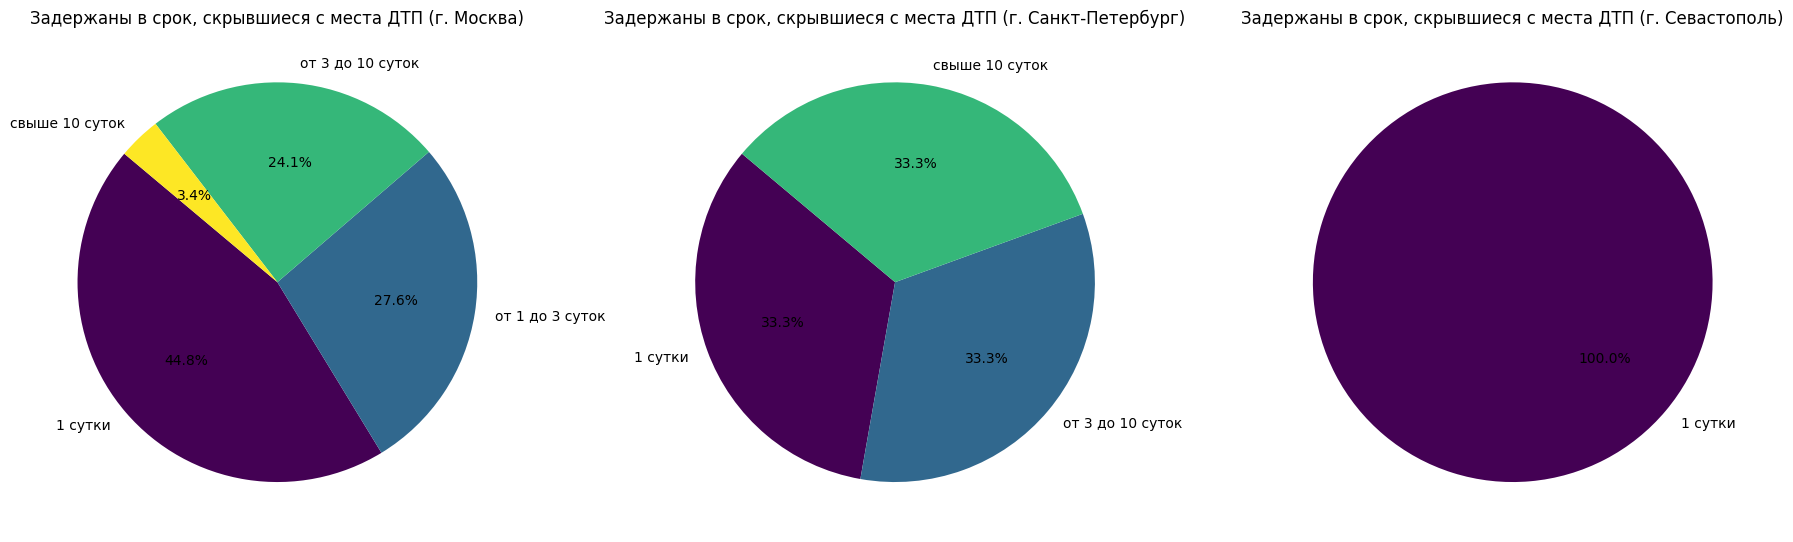

In [127]:
xls = pd.ExcelFile("./assets/dtp7.xls")
dfs = [pd.read_excel(xls, sheet_name=sheet, skiprows=8, nrows=4, usecols="B,D").dropna() for sheet in xls.sheet_names]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, df, city in zip(axes, dfs, cities):
  categories = df.iloc[:,0].tolist()
  colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))
  data = df.iloc[:, 1].astype(int).tolist()
  filtered_values, filtered_labels = zip(*[(v, c) for v, c in zip(data, categories) if v > 0])
  wedges = ax.pie(filtered_values, labels=filtered_labels, autopct='%1.1f%%', startangle=140, colors=colors)
  ax.set_title(f"Задержаны в срок, скрывшиеся с места ДТП ({city})")

plt.tight_layout()
plt.show()

As we can see, the statistics in different cities differ too much from each other.

In Sevastopol, due to the small city and the small number of accidents, all those who escaped are found within 1 day

In St. Petersburg, every third driver is found within 10 days.

In Moscow, almost 50% are found within 1 day and 70% are found within the first 3 days